# Desafio Ciência de Dados Lighthouse
#### Situação:
Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de `criação de uma plataforma de aluguéis temporários na cidade de Nova York`. 
#### Objetivo:
- Desenvolver uma estratégia de precificação.

#### Passos e Perguntas a serem respondidas

1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!


2. Responda também às seguintes perguntas:
    - Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
    - O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
    - Existe algum padrão no texto do nome do local para lugares de mais alto valor?
    
    
3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


4. Supondo um apartamento com as seguintes características:

`{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}`

   Qual seria a sua sugestão de preço?
   
   
5. Salve o modelo desenvolvido no formato .pkl. 


6. A entrega deve ser feita através de um repositório de código público que contenha:
    - README explicando como instalar e executar o projeto
    - Arquivo de requisitos com todos os pacotes utilizados e suas versões
    - Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
    - Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
    - Arquivo .pkl conforme passo 5 acima.


## Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport
import folium 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

## Importando a Base de Dados

In [2]:
df = pd.read_csv('teste_indicium_precificacao.csv')
display(df)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [4]:
colunas = ['bairro_group', 'bairro', 'room_type']
for coluna in colunas:
    print(f'Tipos na coluna: {coluna}\n\n{df[coluna].value_counts()}')
    print('-'*30)

Tipos na coluna: bairro_group

Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: bairro_group, dtype: int64
------------------------------
Tipos na coluna: bairro

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: bairro, Length: 221, dtype: int64
------------------------------
Tipos na coluna: room_type

Entire home/apt    25409
Private room       22325
Shared room         1160
Name: room_type, dtype: int64
------------------------------


In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percentual = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

conjunto = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'], sort=False).sort_values('Total', ascending=False)
conjunto.head(20)

,Total,Percentual
ultima_review,10052,0.205588
reviews_por_mes,10052,0.205588
host_name,21,0.000430
nome,16,0.000327
id,0,0.000000
host_id,0,0.000000
bairro_group,0,0.000000
bairro,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


- As linhas com valores vazios nas coluans, host_name e nome, posso excluir já que é um número muito baixo e não tem necessidade de preencher, o que pode até piorar. 
- Vou substituir os valores NaN da coluna "reviews_por_mes" pela sua média de acordo com o "room_type" e "bairro_group".

In [6]:
df.dropna(subset=['host_name', 'nome'], inplace=True)

In [7]:
def formatar_valor(valor):
    return f"{valor:,.2f}"

def formatar_preco(valor):
    return f"${valor:,.2f}"

In [8]:
media_reviews = df.loc[:, ['reviews_por_mes', 'room_type', 'bairro_group']].groupby(['bairro_group', 'room_type']).mean()
media_reviews['reviews_por_mes'] = media_reviews['reviews_por_mes'].map(formatar_valor)
display(media_reviews)

reviews_por_mes
bairro_group  room_type                      
Bronx         Entire home/apt            2.24
              Private room               1.64
              Shared room                1.35
Brooklyn      Entire home/apt            1.32
              Private room               1.26
              Shared room                1.07
Manhattan     Entire home/apt            1.14
              Private room               1.45
              Shared room                1.79
Queens        Entire home/apt            1.97
              Private room               1.95
              Shared room                1.52
Staten Island Entire home/apt            2.07
              Private room               1.70
              Shared room                1.33

In [9]:
df['reviews_por_mes'].fillna(df.groupby(['bairro_group', 'room_type'])['reviews_por_mes'].transform(lambda x: x.mean()), inplace=True)
df['reviews_por_mes'] = df['reviews_por_mes'].map(formatar_valor)
df['reviews_por_mes'] = df['reviews_por_mes'].astype(np.float32)

## Entendendo os Dados EDA

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.885700e+04,4.885700e+04,48857.000000,48857.00000,48857.000000,48857.000000,48857.000000,48857.000000,48857.000000,48857.000000
mean,1.902374e+07,6.763307e+07,40.728943,-73.95217,152.740385,7.012567,23.273390,1.369447,7.148392,112.796263
std,1.098267e+07,7.862410e+07,0.054527,0.04616,240.234843,20.019944,44.550307,1.502490,32.964937,131.607363
min,2.595000e+03,2.438000e+03,40.499790,-74.24442,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.476198e+06,7.821383e+06,40.690090,-73.98307,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.969118e+07,3.079133e+07,40.723070,-73.95568,106.000000,3.000000,5.000000,1.140000,1.000000,45.000000
75%,2.915779e+07,1.074344e+08,40.763110,-73.93628,175.000000,5.000000,24.000000,1.810000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.71299,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Distribuição dos preços dos imóveis em NY

Text(0.5, 1.0, 'Distribuição dos preços')

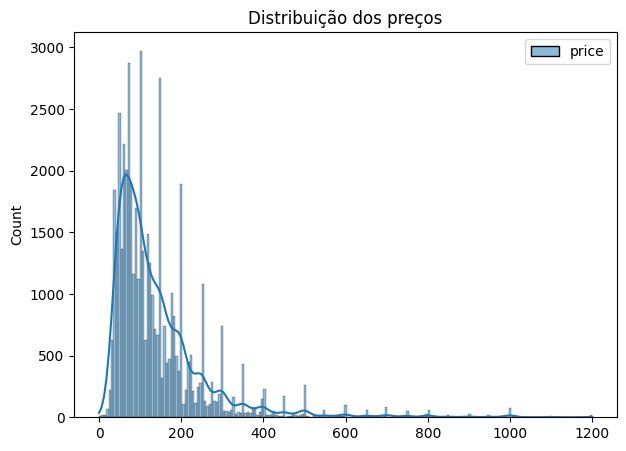

In [11]:
plt.figure(figsize=(7, 5))
preco = df.loc[df['price']<=1200, :][['price']]
sns.histplot(preco, color='green', kde=True)
plt.title('Distribuição dos preços')

Pelo gráfico acima, podemos ver que a maioria dos imóveis gira em torno de $150.

### Média e desvio padrão dos imóveis de NY

In [12]:
print('A média de aluguel em NY é: US${:,.2f}'.format(df.price.mean()))
print('O desvio padrão é: US${:,.2f}'.format(df.price.std()))

A média de aluguel em NY é: US$152.74
O desvio padrão é: US$240.23


- O desvio padrão mostra que o preço mais alto deve estar em torno de 392.00 dólares e o menor em quase 0.

In [13]:
print(df.price.min())

0


### Média | Desvio padrão | máximo | mínino dos preços de acordo com "bairro_group"

In [14]:
df.groupby('bairro_group')['price'].agg(['mean', 'std', 'max', 'min'])

,mean,std,max,min
bairro_group,,,,
Bronx,87.469238,106.798933,2500,0
Brooklyn,124.409299,186.941267,10000,0
Manhattan,196.897473,291.489822,10000,0
Queens,99.536017,167.128794,10000,10
Staten Island,114.812332,277.620403,5000,13


### Média dos preços por grupo de bairros em NY

In [15]:
media_preco_gb = df.loc[:, ['bairro_group', 'price']].groupby('bairro_group').mean()
display(media_preco_gb)

,price
bairro_group,
Bronx,87.469238
Brooklyn,124.409299
Manhattan,196.897473
Queens,99.536017
Staten Island,114.812332


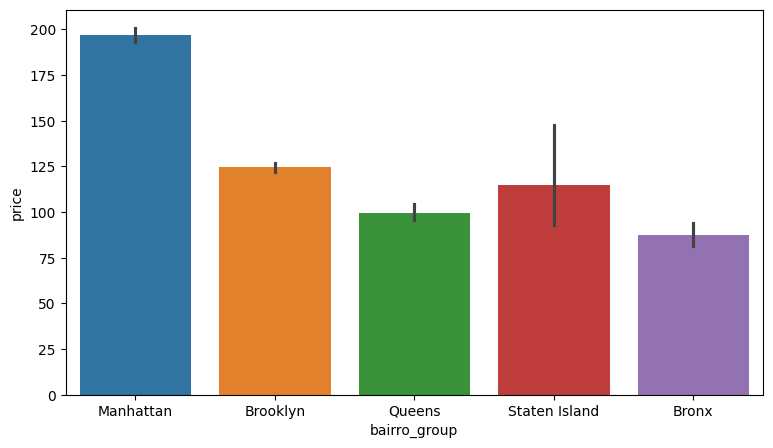

In [16]:
plt.figure(figsize=(9, 5))
sns.barplot(x="bairro_group", y='price', hue='bairro_group', data=df)
plt.show()

### Média dos preços por tipo de quarto em NY

In [17]:
media_preco_room_type = df.loc[:, ['room_type', 'price']].groupby('room_type').mean()
display(media_preco_room_type)

,price
room_type,
Entire home/apt,211.806994
Private room,89.791706
Shared room,70.075928


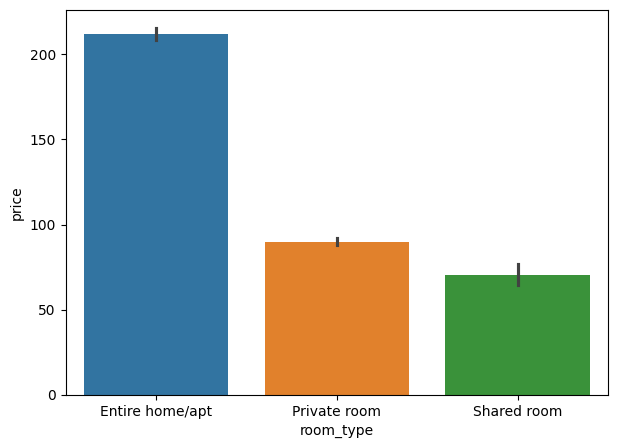

In [18]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='room_type', y='price', hue='room_type', data=df)
plt.show()

### Média dos preços de cada tipo de quarto em cada grupo de bairros

In [19]:
media_preco = df.loc[:, ['bairro_group', 'room_type', 'price']].groupby(['bairro_group', 'room_type']).mean()
display(media_preco)

price
bairro_group  room_type                  
Bronx         Entire home/apt  127.645503
              Private room      66.788344
              Shared room       58.610169
Brooklyn      Entire home/apt  178.362609
              Private room      76.503458
              Shared room       50.527845
Manhattan     Entire home/apt  249.238211
              Private room     116.805594
              Shared room       88.977083
Queens        Entire home/apt  147.050573
              Private room      71.776855
              Shared room       69.020202
Staten Island Entire home/apt  173.846591
              Private room      62.292553
              Shared room       57.444444

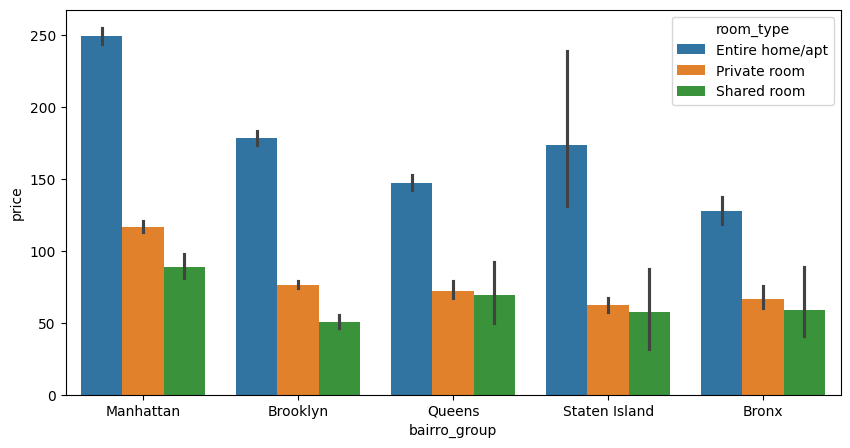

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x='bairro_group', y='price', hue ='room_type', data=df)
plt.show()

### Distribuição dos tipos de quarto para cada grupo de bairro

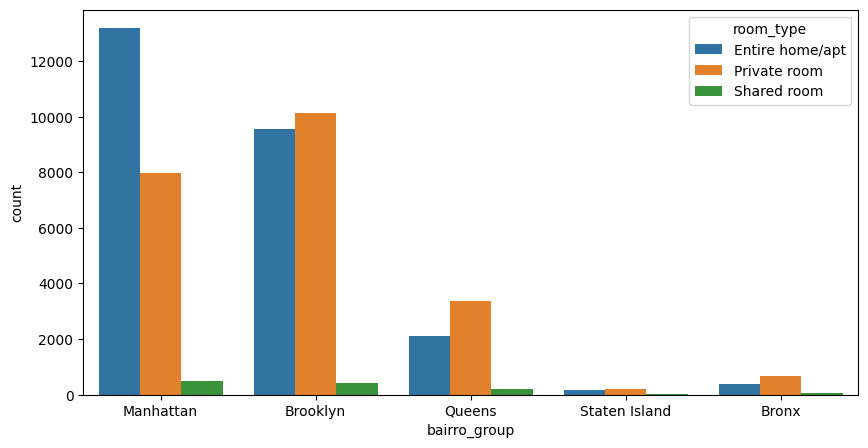

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "bairro_group", hue = "room_type", data = df)
plt.show()

### Quantidade de imóveis por host

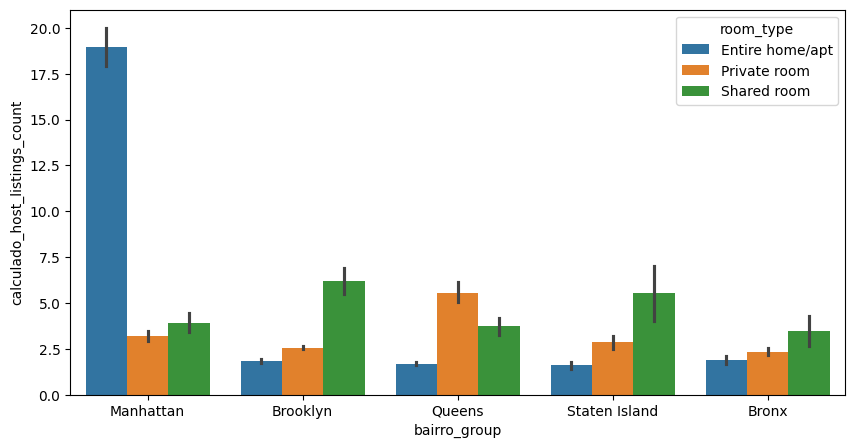

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x="bairro_group", y="calculado_host_listings_count", hue ="room_type", data = df)
plt.show()

### Onde os hosts possuem mais imóveis

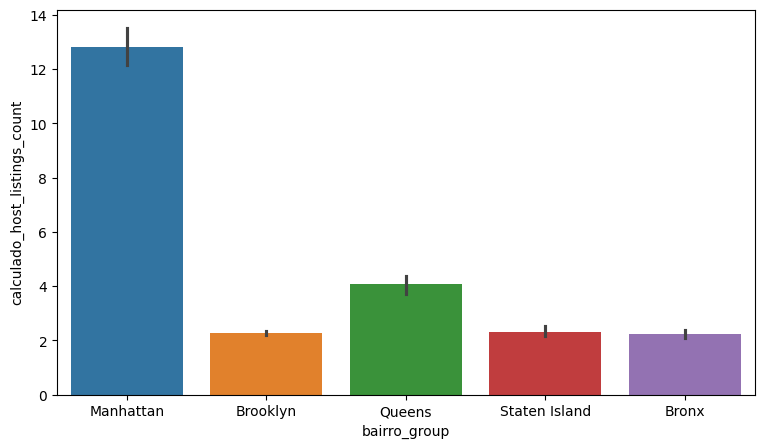

In [23]:
plt.figure(figsize=(9, 5))
sns.barplot(x='bairro_group', y='calculado_host_listings_count', hue ='bairro_group', data=df)
plt.show()

- Todos os gráficos acima apontam que Manhattan é o bairro mais caro, mas mesmo assim ele se destaca pela quantidade e preferência das pessoas ao alugarem um imóvel.

### Quantidade de reviews

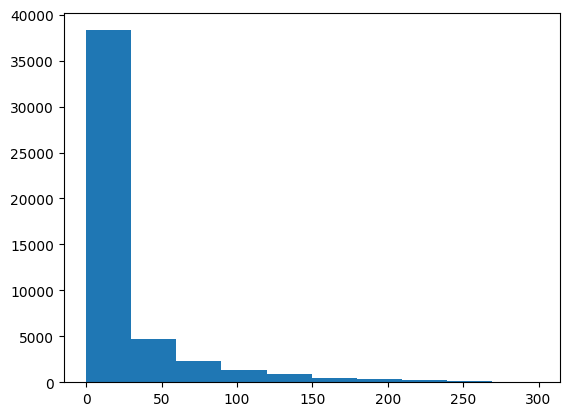

In [24]:
reviews = df.loc[df['numero_de_reviews']<300, :][['numero_de_reviews']]
plt.hist(reviews)
plt.show()

- O número de reviews é muito baixo, mas pode ser o padrão do airbnb.

### Distribuição das colunas numéricas

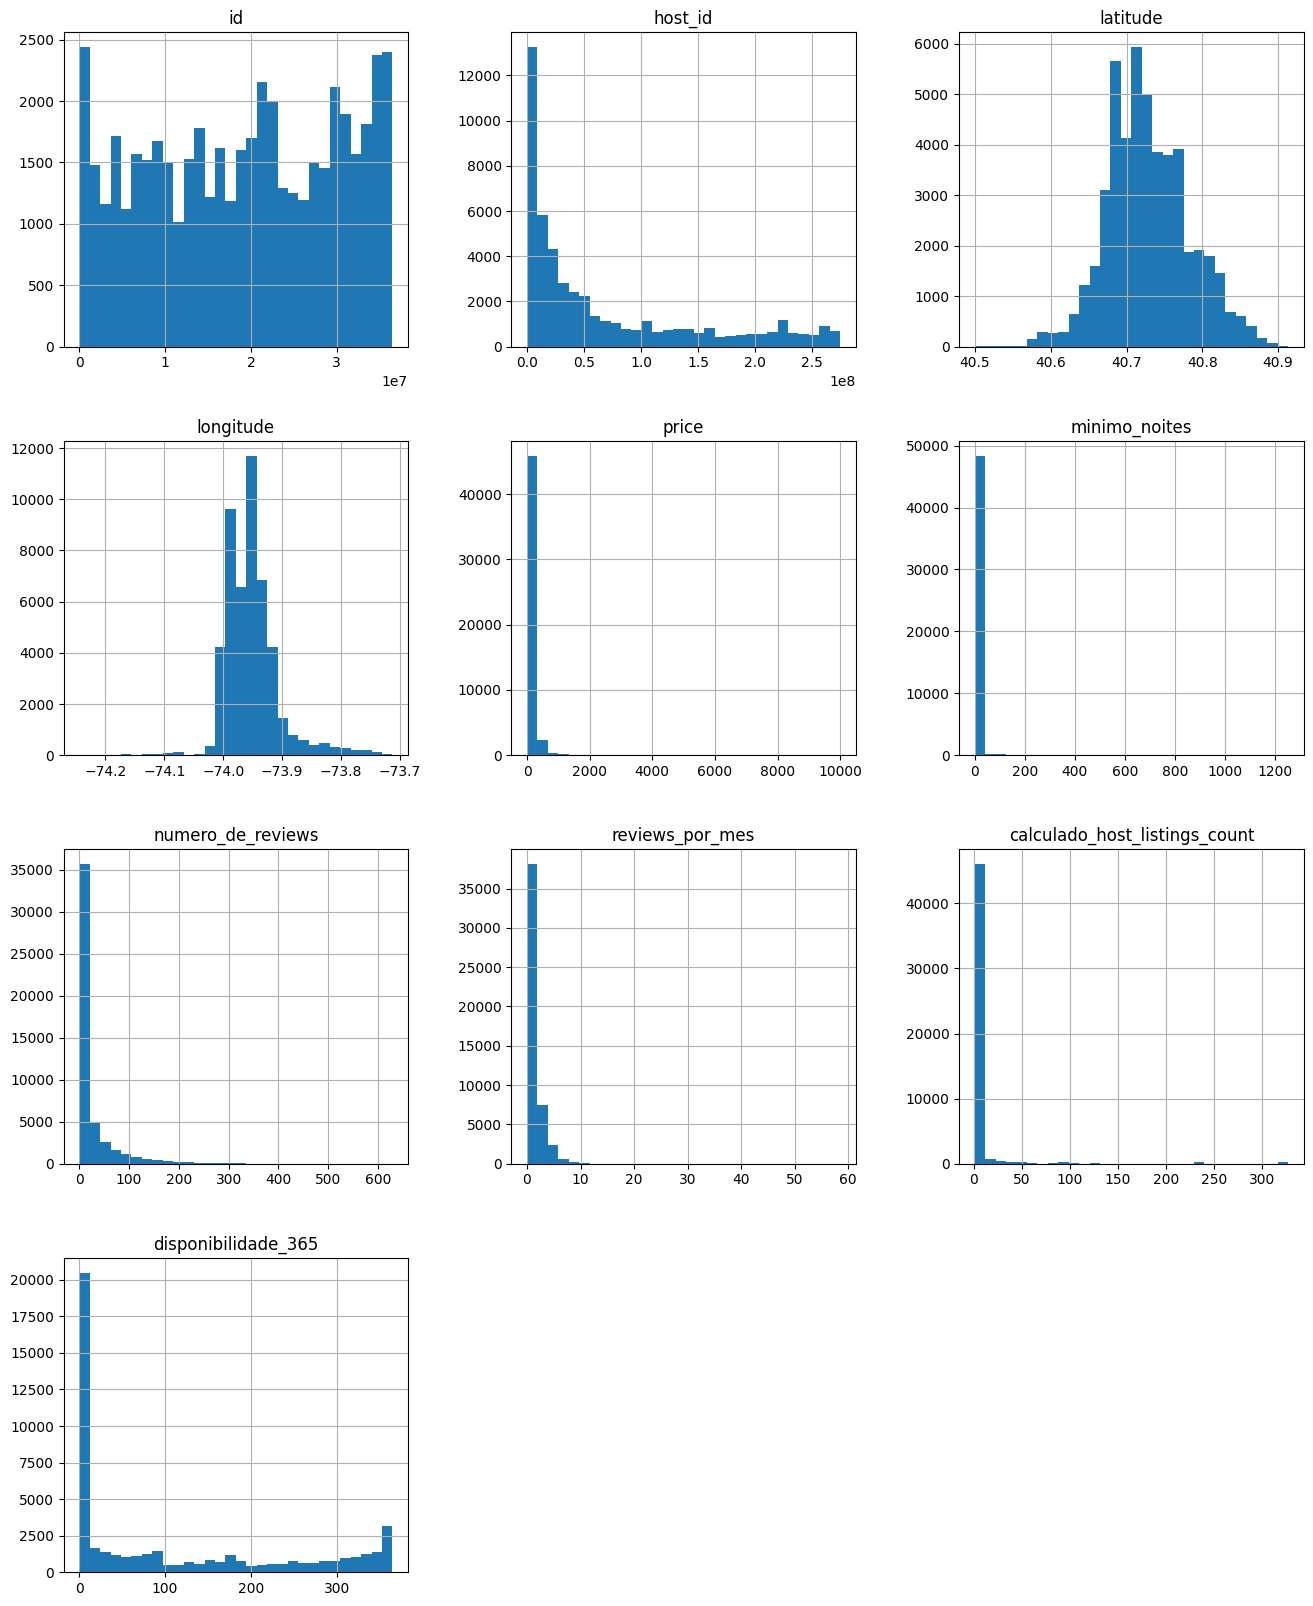

In [25]:
colunas_numericas = df.select_dtypes(include=[np.number])
colunas_numericas.hist(figsize=(16, 20), bins=30)
plt.show()

### Visualização Gráfica de New York

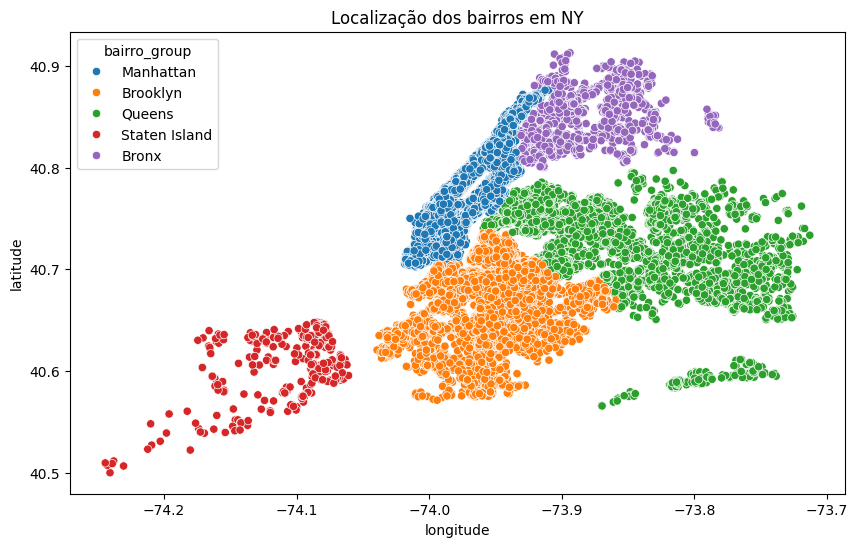

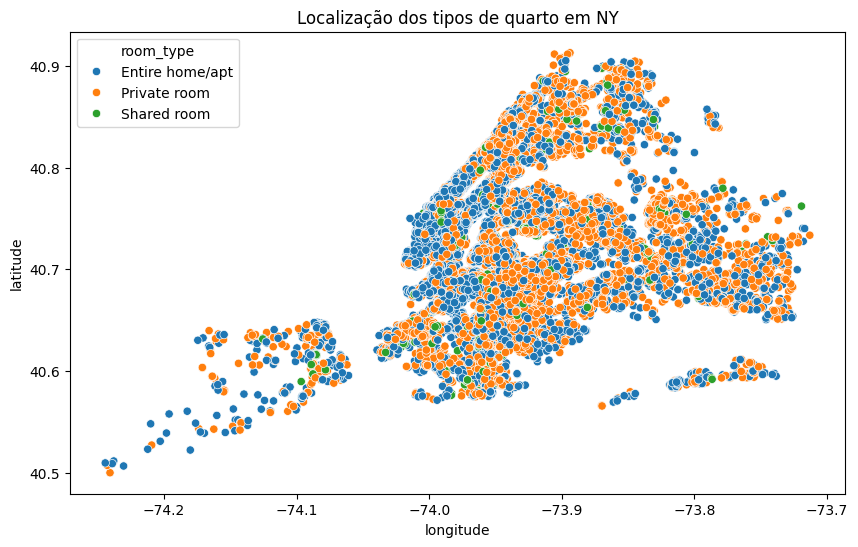

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="longitude", y="latitude", hue="bairro_group", data=df)
plt.title("Localização dos bairros em NY")
plt.ioff()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="longitude", y="latitude", hue="room_type", data=df)
plt.title("Localização dos tipos de quarto em NY")
plt.ion()

## 1. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
- Qual a distribuição dos grupos de bairros?

### Distribuição ''bairro_group''

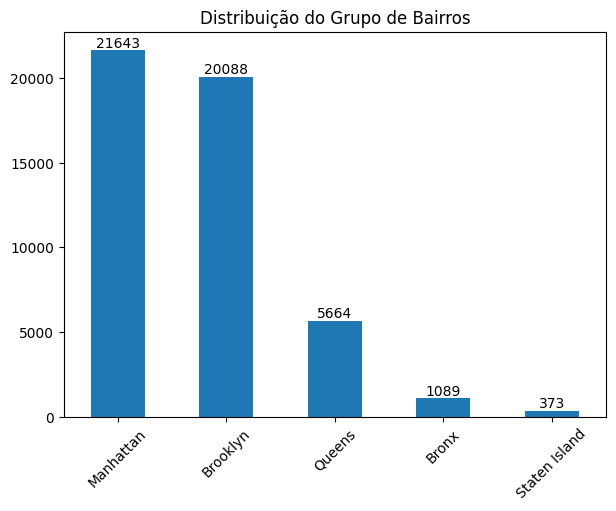

In [27]:
plt.figure(figsize=(7, 5))
ax = df.loc[:, 'bairro_group'].value_counts().sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Distribuição do Grupo de Bairros')
plt.show()

### Distribuição do número de avaliações por grupo de bairros

In [28]:
df.loc[:, ['bairro_group', 'numero_de_reviews']].groupby('bairro_group').sum().sort_values(by='numero_de_reviews', ascending=False)

,numero_de_reviews
bairro_group,
Brooklyn,486165
Manhattan,454126
Queens,156902
Bronx,28334
Staten Island,11541


- Observação: De acordo com o gráfico acima, Brooklyn e Manhattan, tanto são predominantes de acordo com o grupo de bairros, quanto também no número de avaliações. Portanto, as pessoas optam mais por alugar imóveis nesses dois lugares.

### TOP 5 Bairros de Manhattan e Brooklyn

In [29]:
brooklyn = df.loc[df['bairro_group']=='Brooklyn', :]
manhattan = df.loc[df['bairro_group']=='Manhattan', :]
top_brooklyn = brooklyn['bairro'].value_counts().head()
top_manhattan = manhattan['bairro'].value_counts().head()
print('Manhattan:')
display(top_manhattan)
print('-'*30)
print('Brooklyn:')
display(top_brooklyn)

Manhattan:


Harlem             2655
Upper West Side    1969
Hell's Kitchen     1954
East Village       1852
Upper East Side    1797
Name: bairro, dtype: int64

------------------------------
Brooklyn:


Williamsburg          3917
Bedford-Stuyvesant    3713
Bushwick              2462
Crown Heights         1563
Greenpoint            1113
Name: bairro, dtype: int64

- Em Manhattan, o bairro que predominou foi Harlem.
- Em Brooklyn, os bairros que predominaram foram Williamsburg e Bedford-Stuyvesant

### TOP 10 bairros 

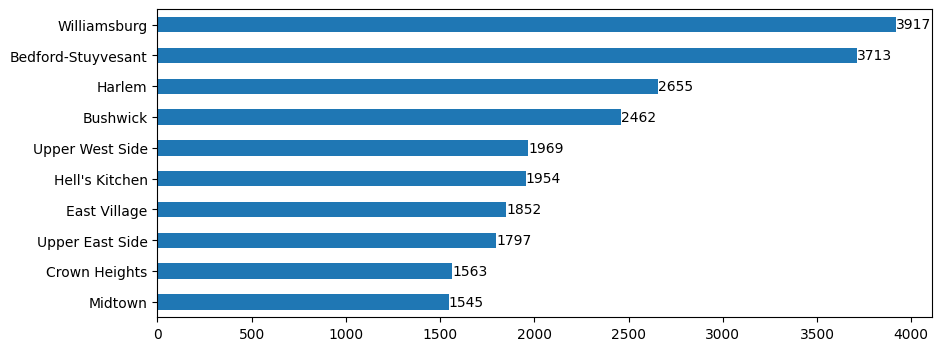

In [30]:
plt.figure(figsize=(10, 4))
ax = df["bairro"].value_counts().head(10).sort_values().plot(kind = "barh")
ax.bar_label(ax.containers[0])
plt.show()

- Podemos ver que  Williamsburg e Bedford-Stuyvesant predominam, mas os preços são favoráveis também?

### Comparando o preço médio nos TOP 1 de Manhattan e Brooklyn

In [31]:
harlem = df.loc[df['bairro']=='Harlem', :]
print('O preço médio em Harlem é ${:.2f}'.format(harlem.price.mean()))

O preço médio em Harlem é $118.95


In [32]:
williamsburg = df.loc[df['bairro']=='Williamsburg', :]
print('O preço médio em Williamsburg é ${:.2f}'.format(williamsburg.price.mean()))

bedford_stuyvesant = df.loc[df['bairro']=='Bedford-Stuyvesant', :]
print('O preço médio em Bedford-Stuyvesant é ${:.2f}'.format(bedford_stuyvesant.price.mean()))

O preço médio em Williamsburg é $143.83
O preço médio em Bedford-Stuyvesant é $107.69


- Bedford-Stuyvesant é o TOP 2 de bairros e o preço médio na região é melhor que no Williamsburg e em Harlem.

### Distribuição de room_type em Manhattan e Brooklyn

In [33]:
manhattan['room_type'].value_counts()

Entire home/apt    13190
Private room        7973
Shared room          480
Name: room_type, dtype: int64

In [34]:
brooklyn['room_type'].value_counts()

Private room       10122
Entire home/apt     9553
Shared room          413
Name: room_type, dtype: int64

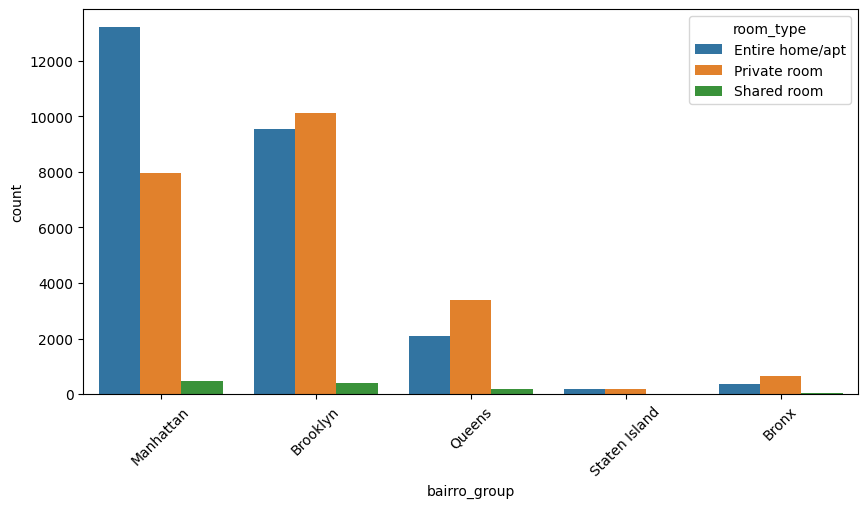

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "bairro_group", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

### Relação de room_type com price em Manhattan e em Brooklyn
- Harlem

In [36]:
harlem = df.loc[df['bairro']=='Harlem', :]
room_type_harlem = harlem.loc[:, ['room_type', 'price']].groupby('room_type').mean()
display(room_type_harlem)

,price
room_type,
Entire home/apt,177.477295
Private room,81.982177
Shared room,68.081633


- Bedford-Stuyvesant

In [37]:
bedford_stuyvesant = df.loc[df['bairro']=='Bedford-Stuyvesant', :]
room_type_bedford_stuyvesant = bedford_stuyvesant.loc[:, ['room_type', 'price']].groupby('room_type').mean()
display(room_type_bedford_stuyvesant)

,price
room_type,
Entire home/apt,154.780641
Private room,73.298478
Shared room,50.376471


### TOP 5 Hosts
Na análise inicial, Manhattan era sempre o que mais de destacava, o que por intuição o melhor lugar para se alugar um imóvel seria em Manhattan. Porém, com a análise acima, os dois bairros que mais aparecem são de Brooklyn.

Sendo assim, o que poderia explicar o porquê de manhattan ser sempre o top 1, seria por exemplo, um único host possuir muitos imóveis. Vamos analisar isso a seguir

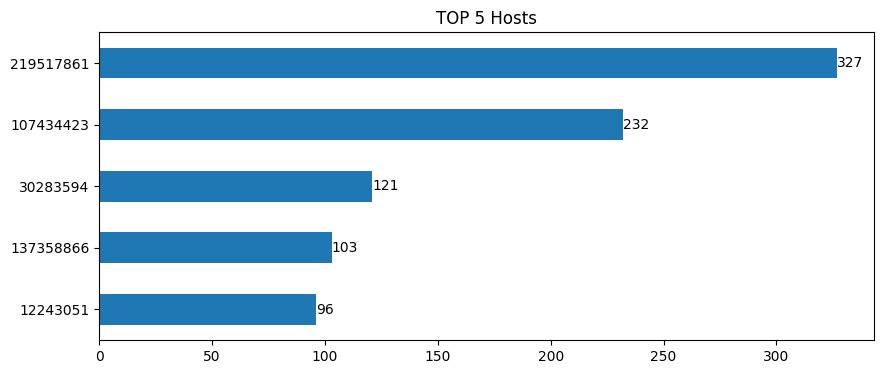

In [38]:
plt.figure(figsize=(10, 4))
ax = df["host_id"].value_counts().head(5).sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0])
plt.title("TOP 5 Hosts")
plt.show()

### Onde o Host 219517861 possui mais imóveis?

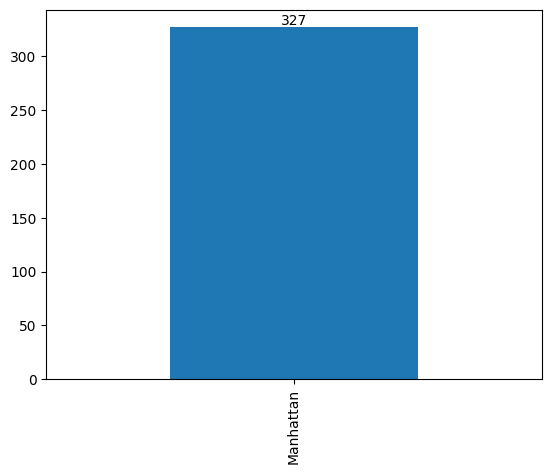

In [39]:
ax = df.loc[df["host_id"]==219517861, :]['bairro_group'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], fontsize=10);

### E o segundo Host?

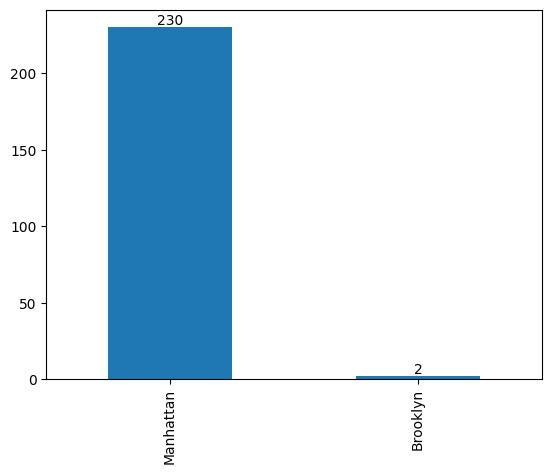

In [40]:
ax = df.loc[df["host_id"]==107434423, :]['bairro_group'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], fontsize=10);

- Por incrível que pareça, todos os imóveis do Host 219517861 ficam em Manhattan, e não só isso, como também podemos ver que segundo host possui praticamente todos os imóveis em Manhattan. Então a nossa hipótese do motivo de Manhattan sempre ser o TOP 1 estava certa. 

#### Conclusão
Com base nas análises acima, supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, Brooklyn - Bedford_Stuyvesant seria o lugar mais indicado a compra. Brooklyn - Bedford_Stuyvesant é o segundo lugar mais escolhido pelas pessoas. A média de preços em Brooklyn é de `$124.41`, e em Bedford_Stuyvesant a média é de `$107.69`. Além disso, acima podemos ver que em relação ao custo de imóveis por tipo de quarto em Manhattam-Harlem e em Brooklyn - Bedford_Stuyvesant, este é muito mais favorável e acessível.

Em Bedford_Stuyvesant a opção mais escolhida é a private room.
A média de preços em NY para Private room é de `$89.79`, sendo que em Brooklyn - Bedford_Stuyvesant, o preço médio para o mesmo tipo de quarto é de `$73.30`.

## 2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
-----------------------------------------------------------------------------------------------------------------------------
### Mínimo de noites e disponibilidade ao longo do ano

In [41]:
# máximo de noites que pode ser agendado
df.minimo_noites.max()

1250

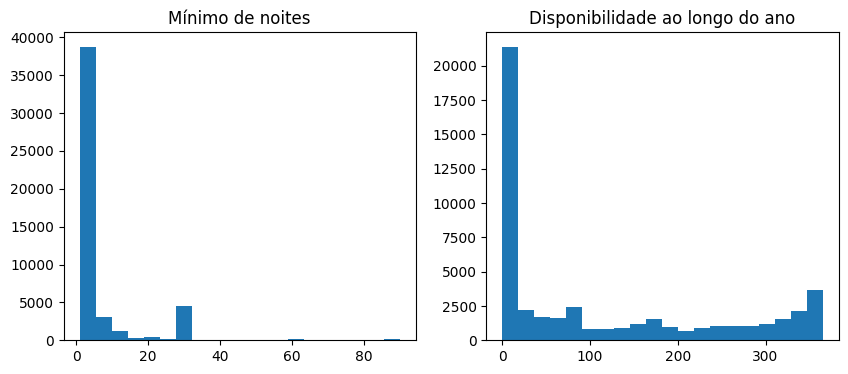

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
min_noites = df.loc[df['minimo_noites']<=90, :][['minimo_noites']]
disp_365 = df.loc[df["disponibilidade_365"]<=365, :][["disponibilidade_365"]]

axs[0].hist(min_noites, bins=20)
axs[0].set_title('Mínimo de noites')
axs[1].hist(disp_365, bins=20)
axs[1].set_title('Disponibilidade ao longo do ano')
plt.show()

- Podemos ver que a maioria prefere alugar por cinco a sete dias, e depois há uma concentração de pessoas que alugam mensalmente, por 30 dias, podem ser pessoas locais. 
- Na distribuição ao longo do ano, majoritariamente as pessoas preferem alugar por períodos mais curtos, mensalmente por exemplo.

### Correlação das colunas com a coluna "price"

In [43]:
correlacao = df.corr()
print(correlacao['price'].sort_values(ascending=False))

price                            1.000000
disponibilidade_365              0.081821
calculado_host_listings_count    0.057460
minimo_noites                    0.042804
latitude                         0.033945
host_id                          0.015327
id                               0.010564
reviews_por_mes                 -0.029274
numero_de_reviews               -0.047949
longitude                       -0.149954
Name: price, dtype: float64


<Axes: >

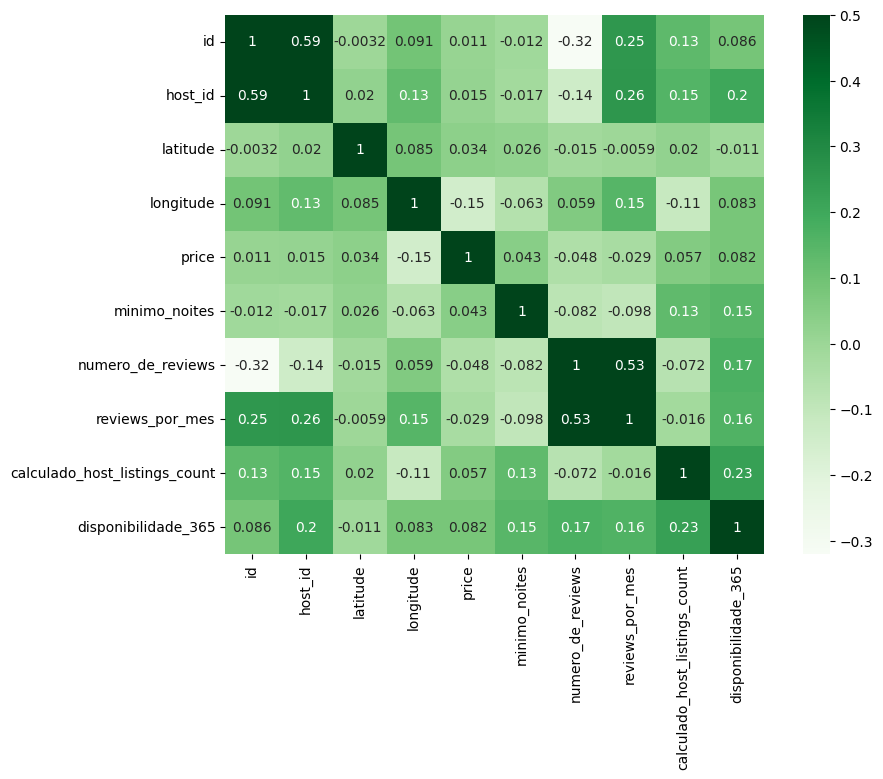

In [44]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlacao, square=True, vmax=0.5, cmap='Greens', annot=True)

- Embora a correlação das colunas "minimo_noites" e "disponibilidade_365" sejam altas em comparação com o restante, essa correlação ainda é baixa, portanto, não interfere muito no preço dos imóveis em New York.

## Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [45]:
display(df.head())

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.45,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


- Por uma percepção rápida, o que se repete é a palavra "Hill" nos nomes dos bairros, como "Clinton Hill" e "Murray Hill".

In [46]:
df.bairro.unique()

array(['Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', 'Murray Hill',
       'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side',
       'Chinatown', 'South Slope', 'West Village', 'Williamsburg',
       'Fort Greene', 'Chelsea', 'Crown Heights', 'Park Slope',
       'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint',
       'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Astoria', 'Kensing

- Os que mais se repetem são: Hills / Heights / District

### Média de preços por bairro

In [47]:
df.loc[:, ['price', 'bairro']].groupby('bairro').mean().sort_values(by='price', ascending=False).head(20)

,price
bairro,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.086957
Flatiron District,341.925000
Randall Manor,336.000000


- Não existe relação do nome do local com o preço. Se existesse alguma relação, apareceria na tabela da média dos preços por filtrada por bairro. 

In [48]:
data_plot = df.loc[:, ['price', 'bairro_group', 'latitude', 'longitude']].groupby('bairro_group').max().reset_index()
display(data_plot)

,bairro_group,price,latitude,longitude
0,Bronx,2500,40.91306,-73.78158
1,Brooklyn,10000,40.73890,-73.85676
2,Manhattan,10000,40.87665,-73.90855
3,Queens,10000,40.79721,-73.71299
4,Staten Island,5000,40.64779,-74.06092


In [49]:
f = folium.Figure(width=1024 , height=768)

map = folium.Map(
    location = [data_plot['latitude'].mean(),
        data_plot['longitude'].mean()],

    zoom_start=14,
    control_scale=True
)

for index, location_info in data_plot.iterrows(): #vai transformar essa df(data_plot) em uma lista para podermos percorrer com o for
    folium.Marker( [location_info['latitude'], location_info['longitude']],
                    popup=location_info['bairro_group'] ).add_to(map)
map

## Tratando outlier da coluna price

In [50]:
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)
amplitude = q3_price - q1_price
lim_inferior = q1_price - 1.5*amplitude
lim_superior = q3_price + 1.5*amplitude

df_preco = df.loc[(df['price'] >= lim_inferior) & (df['price'] <= lim_superior), :]

<Axes: xlabel='price'>

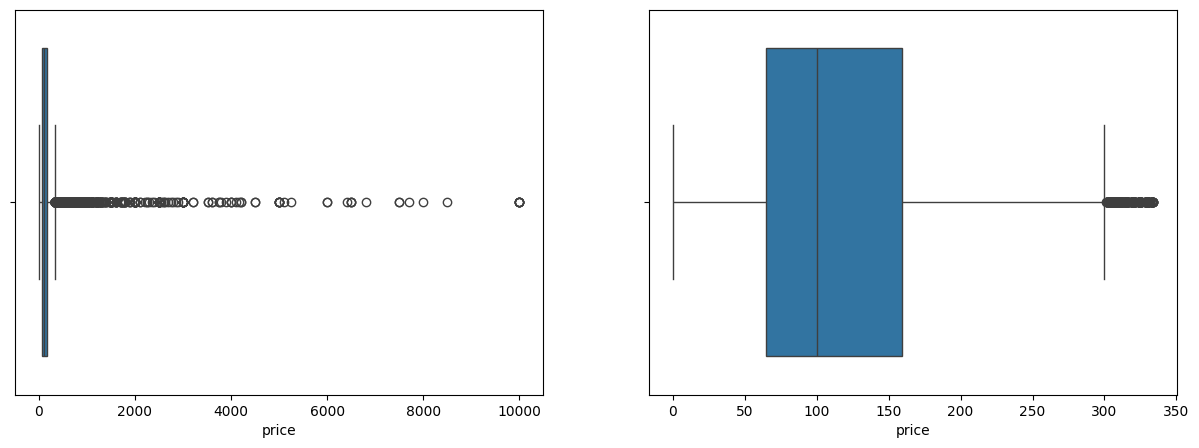

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2) #uma linha, duas colunas
fig.set_size_inches(15, 5)
sns.boxplot(x=df['price'], ax=ax1)
sns.boxplot(x=df_preco['price'], ax=ax2)

In [52]:
df = df_preco

### Visualização Gráfica - distribuição dos preços em NY

<Figure size 1000x500 with 0 Axes>

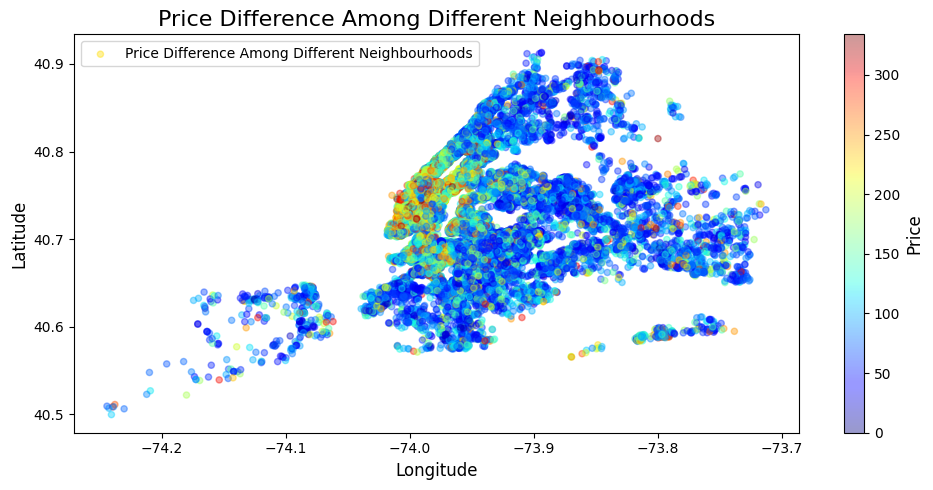

In [53]:
plt.figure(figsize=(10, 5))

# Create the scatter plot
viz_4 = df.plot(kind='scatter', x='longitude', y='latitude', label='Price Difference Among Different Neighbourhoods', c='price',
                cmap='jet', colorbar=True, alpha=0.4, figsize=(10, 5))

# Set plot title and labels
plt.title('Price Difference Among Different Neighbourhoods', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Adjust colorbar
colorbar = viz_4.collections[0].colorbar
colorbar.set_label('Price', fontsize=12)

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()

## Encoding dos dados

- Colunas com alta cardinalidade como id, nome, host_id, host_name não vão ajudar no modelo.

In [54]:
df_modelo = df.drop(['id', 'nome', 'host_id', 'host_name', 'numero_de_reviews', 'ultima_review', 'reviews_por_mes'], axis=1)
display(df_modelo.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45886 entries, 0 to 48893
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bairro_group                   45886 non-null  object 
 1   bairro                         45886 non-null  object 
 2   latitude                       45886 non-null  float64
 3   longitude                      45886 non-null  float64
 4   room_type                      45886 non-null  object 
 5   price                          45886 non-null  int64  
 6   minimo_noites                  45886 non-null  int64  
 7   calculado_host_listings_count  45886 non-null  int64  
 8   disponibilidade_365            45886 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 3.5+ MB


None

### Colunas de texto

In [55]:
colunas_texto = df_modelo.select_dtypes(include=['object'])
display(colunas_texto)

,bairro_group,bairro,room_type
0,Manhattan,Midtown,Entire home/apt
1,Manhattan,Harlem,Private room
2,Brooklyn,Clinton Hill,Entire home/apt
3,Manhattan,East Harlem,Entire home/apt
4,Manhattan,Murray Hill,Entire home/apt
...,...,...,...
48889,Brooklyn,Bedford-Stuyvesant,Private room
48890,Brooklyn,Bushwick,Private room
48891,Manhattan,Harlem,Entire home/apt
48892,Manhattan,Hell's Kitchen,Shared room


### Transformando colunas de texto em colunas numéricas
- Com as colunas "bairro_group" e "room_type' vou utilizar o `Label Encoding`, ele atribui um número inteiro único para cada valor da variável categórica. Mas para otimizar irei fazer o Label Encoding de acordo com a ordem decrescente.
- Já com a coluna "bairro" vou utilizar o `One Hot Encoding`, ou seja, tranformar em zeros e uns, já que possuem muitas variedades.

### Label Encoding
- "bairro_group"
- "room_type"

In [56]:
df_modelo['bairro_group'] = df_modelo['bairro_group'].map({'Manhattan': 1,
                                                           'Brooklyn': 2,
                                                           'Queens': 3,
                                                           'Bronx': 4,
                                                           'Staten Island': 5})

df_modelo['room_type'] = df_modelo['room_type'].map({'Entire home/apt': 1,
                                                     'Private room': 2,
                                                     'Shared room': 3})

In [57]:
correlacao = df_modelo.corr()
print(correlacao['price'].sort_values(ascending=False))

price                            1.000000
calculado_host_listings_count    0.174451
latitude                         0.068781
disponibilidade_365              0.066694
minimo_noites                    0.031475
longitude                       -0.306975
bairro_group                    -0.317261
room_type                       -0.607349
Name: price, dtype: float64


### One Hot Encoding
- "bairro"

In [58]:
df_modelo.shape

(45886, 9)

In [59]:
df_modelo = pd.get_dummies(data=df_modelo, columns=['bairro'], drop_first=True)
print(df_modelo.shape)

(45886, 226)


In [60]:
correlacao = df_modelo.corr()
print(correlacao['price'].sort_values(ascending=False))

price                            1.000000
calculado_host_listings_count    0.174451
bairro_Midtown                   0.143399
bairro_West Village              0.128571
bairro_Chelsea                   0.125400
                                   ...   
bairro_Bedford-Stuyvesant       -0.112149
bairro_Bushwick                 -0.139235
longitude                       -0.306975
bairro_group                    -0.317261
room_type                       -0.607349
Name: price, Length: 226, dtype: float64


##  Modelo de Previsão
- Estamos lidando com um problema de regressão.

- Escolha dos modelos a serem testados
    1. Random Forest
    2. LinearRegression
    3. Extra Tree


In [61]:
y = df_modelo['price']
X = df_modelo.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [62]:
modelo_rf = RandomForestRegressor()
# treinar
modelo_rf.fit(X_train, y_train)
# testar
previsao_rf = modelo_rf.predict(X_test)
r2=r2_score(y_test,previsao_rf)
print(r2)

0.5436207611265347


In [63]:
modelo_lr = LinearRegression()
# treinar
modelo_lr.fit(X_train, y_train)
# testar
previsao_lr = modelo_lr.predict(X_test)
r2=r2_score(y_test,previsao_lr)
print(r2)

0.5107202816479458


In [64]:
modelo_et = ExtraTreesRegressor()
# treinar
modelo_et.fit(X_train, y_train)
# testar
previsao_et = modelo_et.predict(X_test)
r2=r2_score(y_test,previsao_et)
print(r2)

0.5127503530315396


In [65]:
y_final_pred = modelo_rf.predict(X_test)
final_y_pred = (y_final_pred)
final_y_test =(y_test)

In [66]:
resultado = pd.DataFrame({'Predicted Price': final_y_pred, 'True Price': final_y_test})

# Calculate the difference between the true prices and predicted prices and add a new column
resultado['Difference'] = resultado['True Price'] - resultado['Predicted Price']

# Display the results
print(resultado)

       Predicted Price  True Price  Difference
28244            87.08          85       -2.08
44320           100.96          70      -30.96
40927            36.38          40        3.62
48328            56.99          75       18.01
15548           142.41         100      -42.41
...                ...         ...         ...
22291            73.34          85       11.66
23690            65.73          59       -6.73
22829            64.21          40      -24.21
9147            146.42          99      -47.42
34974            96.21          60      -36.21

[11472 rows x 3 columns]


## 4. Supondo um apartamento com as seguintes características:

`{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}`

Qual seria a sua sugestão de preço?


O preço seria de $74.00.

## Salvando o nosso modelo

In [67]:
import pickle
with open("LH_CD_NY.pkl", "wb") as file:
     pickle.dump(modelo_rf, file)